In [ ]:
import os
import sys

lib_path = os.path.abspath("").replace("notebooks", "src")
sys.path.append(lib_path)

import torch
import matplotlib.pyplot as plt
from data.dataloader import build_train_test_dataset
from tqdm.auto import tqdm
import numpy as np
from configs.base import Config

In [2]:
INT2LABEL = {
    0: "Anger",
    1: "Happiness",
    2: "Sadness",
    3: "Neutral",
}

In [3]:
cfg = Config()
# Dataset
cfg.batch_size = 1
cfg.data_name = "IEMOCAP"  # [IEMOCAP, ESD, MELD]
cfg.data_root = "data/IEMOCAP_preprocessed"  # folder contains train.pkl and test.pkl
cfg.data_valid = "val.pkl"  
encoder_model = None
train_ds, val_ds = build_train_test_dataset(cfg, encoder_model)
cfg.data_valid = "test.pkl"  
_, test_ds = build_train_test_dataset(cfg, encoder_model)

In [4]:
iemocap_data = []
for _, _, label in train_ds:
    iemocap_data.append(label.detach().cpu().numpy()[0])
for _, _, label in val_ds:
    iemocap_data.append(label.detach().cpu().numpy()[0])
for _, _, label in test_ds:
    iemocap_data.append(label.detach().cpu().numpy()[0])

In [5]:
pie_value = {}
for k, v in INT2LABEL.items():
    num_samples = sum([1 if x == k else 0 for x in iemocap_data ])
    print(v, num_samples)
    pie_value[v] = num_samples

Anger 1103
Happiness 1636
Sadness 1084
Neutral 1708


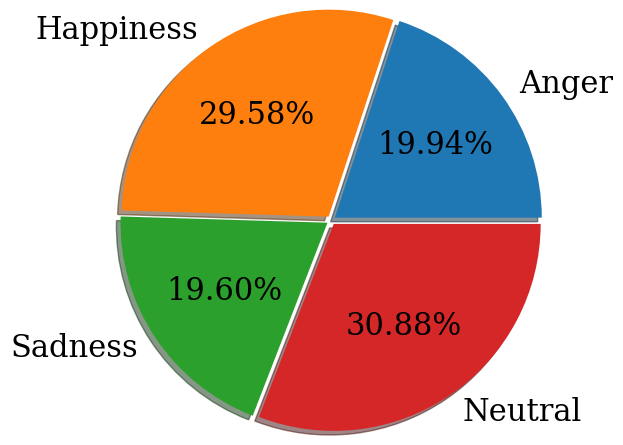

In [6]:
import matplotlib
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
y = np.array(list(pie_value.values()))
mylabels = list(pie_value.keys())
myexplode = [0.03] *4

plt.pie(y, labels = mylabels, explode = myexplode , shadow = True, autopct='%1.2f%%', radius=1.4)
plt.savefig("IEMOCAP_dataset.png", format="png")
plt.show()

In [7]:
cfg = Config()
# Dataset
cfg.batch_size = 1
cfg.data_name = "ESD"  # [IEMOCAP, ESD, MELD]
cfg.data_root = "data/ESD_preprocessed"  # folder contains train.pkl and test.pkl
cfg.data_valid = "val.pkl"  
encoder_model = None
train_ds, val_ds = build_train_test_dataset(cfg, encoder_model)
cfg.data_valid = "test.pkl"  
_, test_ds = build_train_test_dataset(cfg, encoder_model)

In [8]:
esd_data = []
for _, _, label in train_ds:
    esd_data.append(label.detach().cpu().numpy()[0])
for _, _, label in val_ds:
    esd_data.append(label.detach().cpu().numpy()[0])
for _, _, label in test_ds:
    esd_data.append(label.detach().cpu().numpy()[0])

In [9]:
pie_value = {}
for k, v in INT2LABEL.items():
    num_samples = sum([1 if x == k else 0 for x in esd_data ])
    print(v, num_samples)
    pie_value[v] = num_samples

Anger 3500
Happiness 3500
Sadness 3500
Neutral 3500


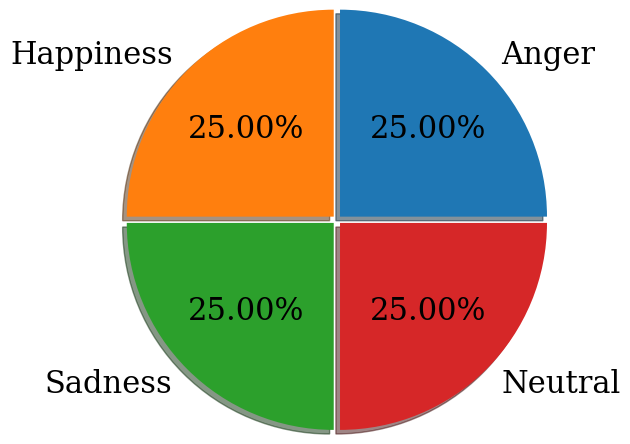

In [10]:
import matplotlib
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)
y = np.array(list(pie_value.values()))
mylabels = list(pie_value.keys())
myexplode = [0.03] *4

plt.pie(y, labels = mylabels, explode = myexplode , shadow = True, autopct='%1.2f%%', radius=1.4)
plt.savefig("ESD_dataset.png", format="png")
plt.show()